## Data Analysis Process

### 1. Questions


### 2. Wrangle

In [145]:
#get data
import pandas as pd

train_df = pd.read_csv('train.csv')
train_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [241]:
#clean

train_df.drop(['PassengerId','Ticket'], axis=1)

survive_count = train_df.groupby('Survived').size() 
pclass_count  = train_df.groupby('Pclass').size()
sex_count     = train_df.groupby('Sex').size()
age_count     = train_df.groupby('Age').size()
sibsp_count   = train_df.groupby('SibSp').size()
parch_count   = train_df.groupby('Parch').size()
emb_count     = train_df.groupby('Embarked').size()

print 'Survived count',survive_count 
print 'Pclass count',pclass_count 
print 'Sex count', sex_count    
print 'Age count', age_count    
print 'SibSp count', sibsp_count  
print 'Parch count', parch_count  
print 'Embarked count', emb_count    

train_df['Age'].fillna(age_count.argmax(), inplace=True)
train_df["Embarked"].fillna(emb_count.argmax(), inplace =True)

#get unique values

unique_survive  = train_df['Survived'].unique()
unique_pclass   = train_df['Pclass'].unique()
unique_sex      = train_df['Sex'].unique()
unique_age      = train_df['Age'].unique()
unique_sibsp    = train_df['SibSp'].unique()
unique_parch    = train_df['Parch'].unique()
unique_embarked = train_df['Embarked'].unique()


print 'Survived', unique_survive
print 'Pclass', unique_pclass
print 'Sex', unique_sex
print 'Age', unique_age
print 'SibSp', unique_sibsp
print 'Parch', unique_parch
print 'Embarked', unique_embarked







Survived count Survived
0    549
1    342
dtype: int64
Pclass count Pclass
1    216
2    184
3    491
dtype: int64
Sex count Sex
female    314
male      577
dtype: int64
Age count Age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    24
22.00    27
23.00    15
         ..
44.00     9
45.00    12
45.50     2
46.00     3
47.00     9
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1
70.00     2
70.50     1
71.00     2
74.00     1
80.00     1
dtype: int64
SibSp count SibSp
0    608
1    209
2     28
3     16
4     18
5      5

In [197]:
def fill_nan_values(group_by, unique_values):
        print train_df.groupby(group_by).size()

### 3. Explore

In [119]:
def mean_survived_column(unique_types, column_name):
    for u in unique_types:
        u_df = train_df.filter(items=['Survived',column_name])
        split_df = u_df.loc[u_df[column_name] == u]
        print u, split_df.mean()
#         print u , split_df['Survived'].mean()

In [120]:
import matplotlib as plt
import seaborn as sns
#survived x Pclass

mean_survived_column(unique_pclass, 'Pclass')


3 Survived    0.242363
Pclass      3.000000
dtype: float64
1 Survived    0.62963
Pclass      1.00000
dtype: float64
2 Survived    0.472826
Pclass      2.000000
dtype: float64


In [121]:
#survived x Sex

mean_survived_column(unique_sex, 'Sex')

male Survived    0.188908
dtype: float64
female Survived    0.742038
dtype: float64


In [245]:
#survived x Age
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt


survived_age_df = train_df.loc[(train_df['Survived'] == 1)].Age
survived_age_df

age_males_survived = train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 1)].Age
age_males_not_survived = train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 0)].Age





In [90]:
#survived x Parch
mean_survived_column(unique_parch, 'Parch')

0 0.343657817109
1 0.550847457627
2 0.5
5 0.2
3 0.6
4 0.0
6 0.0


In [87]:
#survived x SibSp
mean_survived_column(unique_sibsp, 'SibSp')

1 0.535885167464
0 0.345394736842
3 0.25
4 0.166666666667
2 0.464285714286
5 0.0
8 0.0


S Survived    0.339009
dtype: float64
C Survived    0.553571
dtype: float64
Q Survived    0.38961
dtype: float64


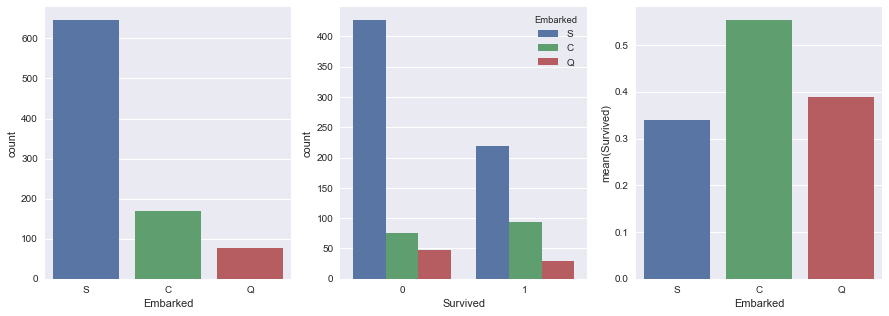

In [244]:
#survived x Embarked
mean_survived_column(unique_embarked, 'Embarked')


fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()

sns.countplot(x='Embarked', data=train_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train_df, order=unique_survive, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=unique_embarked,ax=axis3)


### 4. Conclusions

### 5. Communicate